In [1]:
import pandas as pd
import numpy as np


### Read the clean data extracted using Data-Cleaning-Transformation-Extraction.ipynb

In [7]:
clean_data = pd.read_csv('../data/clean_data.csv')
clean_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,9164566995485190,42.0,5.0,23.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,L77566A,65.0,5.0,16.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,D42335A,28.0,5.0,6.0,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,T21824A,28.0,5.0,44.0,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,D88865A,28.0,5.0,6.0,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [9]:
#get name of columns
clean_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)',
       'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total

### Top 10 handsets used by the customers

1396 users
Number of posts per user


<AxesSubplot:>

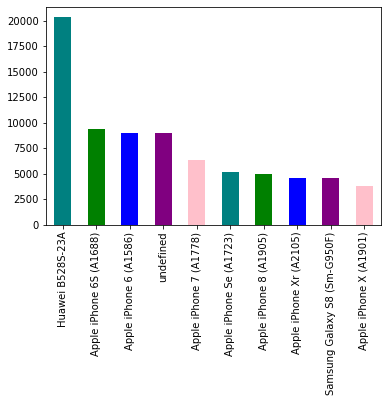

In [15]:
handset_count = clean_data['Handset Type'].value_counts()
print(len(handset_count), "users")
print("Number of posts per user")
handset_count[:10].plot(kind='bar', color=['teal', 'green', 'blue','purple','pink'])


### Top 3 handset manufacturers

170 users
Number of posts per user


<AxesSubplot:>

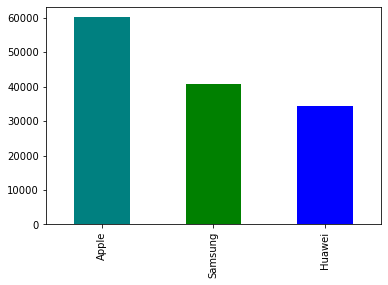

In [16]:
handset_manufacturer = clean_data['Handset Manufacturer'].value_counts()
print(len(handset_manufacturer), "users")
print("Number of posts per user")
handset_manufacturer[:3].plot(
    kind='bar', color=['teal', 'green', 'blue'])


### Top 5 handsets per top 3 manufacturers

<AxesSubplot:xlabel='Handset Manufacturer,Handset Type'>

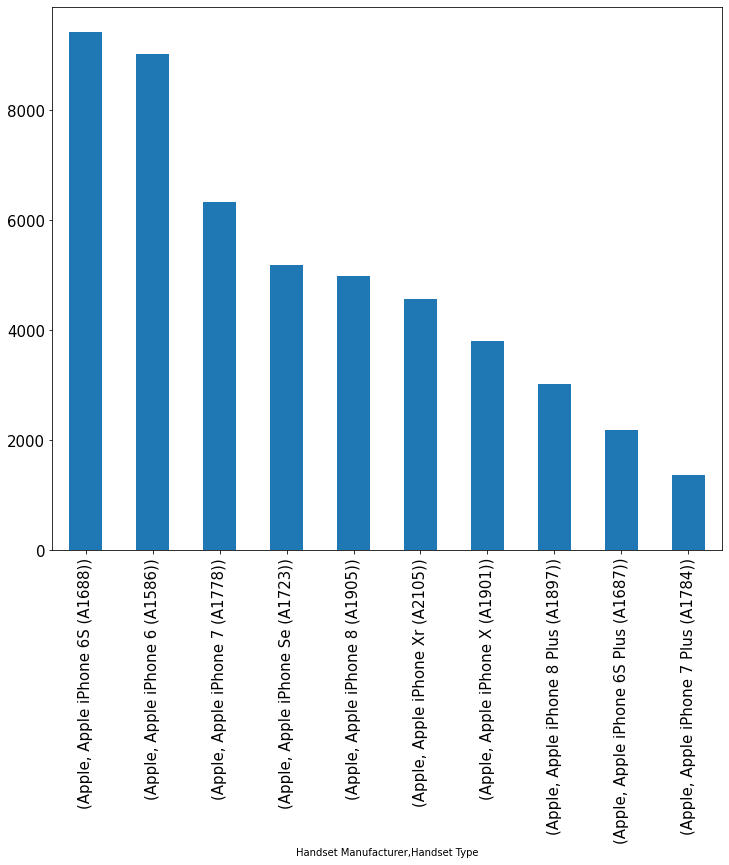

In [23]:
handset_man= clean_data[clean_data['Handset Manufacturer'].isin(['Apple','Sumsung','Huawei'])]
handset_man.groupby('Handset Manufacturer')['Handset Type'].value_counts()[:10].plot.bar(
    figsize=(12, 10), fontsize=15)
